Wall time: 0 ns
帐户初始金额: 300000.00
累计投入本金: 300000.00
累计投入资产: 0.00
累计借入现金: 0.00
累计借入资产: 0.00
累计红利: 0.00
现金余额: 520300.00
未平仓头寸净值: 115600.00
当前总资产: 635900.00
已平仓交易总成本: 0.00
已平仓净利润总额: 311600.00
单笔交易最大占用现金比例%: 90.84
交易平均占用现金比例%: 34.39
已平仓帐户收益率%: 103.87
帐户年复合收益率%: 3.18
帐户平均年收益率%: 4.67
赢利交易赢利总额: 820800.00
亏损交易亏损总额: -509200.00
已平仓交易总数: 67.00
赢利交易数: 18.00
亏损交易数: 49.00
赢利交易比例%: 26.87
赢利期望值: 4650.74
赢利交易平均赢利: 45600.00
亏损交易平均亏损: -10391.84
平均赢利/平均亏损比例: 4.39
净赢利/亏损比例: 1.61
最大单笔赢利: 296000.00
最大单笔亏损: -45500.00
赢利交易平均持仓时间: 125.72
赢利交易最大持仓时间: 440.00
亏损交易平均持仓时间: 23.02
亏损交易最大持仓时间: 72.00
空仓总时间: 5358.00
空仓时间/总时间%: 61.00
平均空仓时间: 79.00
最长空仓时间: 362.00
最大连续赢利笔数: 1.00
最大连续亏损笔数: 7.00
最大连续赢利金额: 305500.00
最大连续亏损金额: -100600.00
R乘数期望值: 0.08
交易机会频率/年: 2.80
年度期望R乘数: 0.22
赢利交易平均R乘数: 0.47
亏损交易平均R乘数: -0.07
最大单笔赢利R乘数: 4.11
最大单笔亏损R乘数: -0.19
最大连续赢利R乘数: 4.88
最大连续亏损R乘数: -0.07



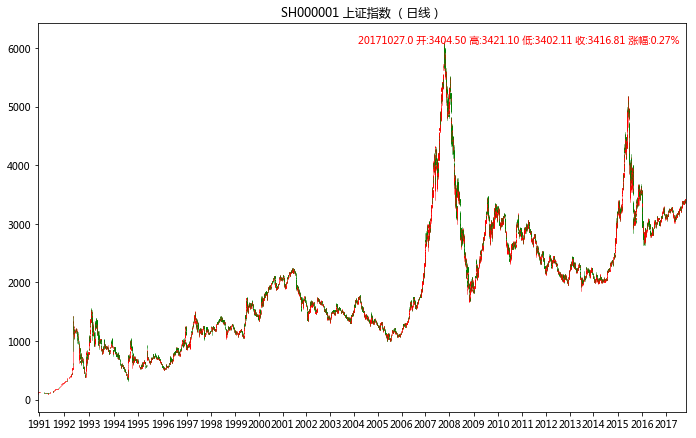

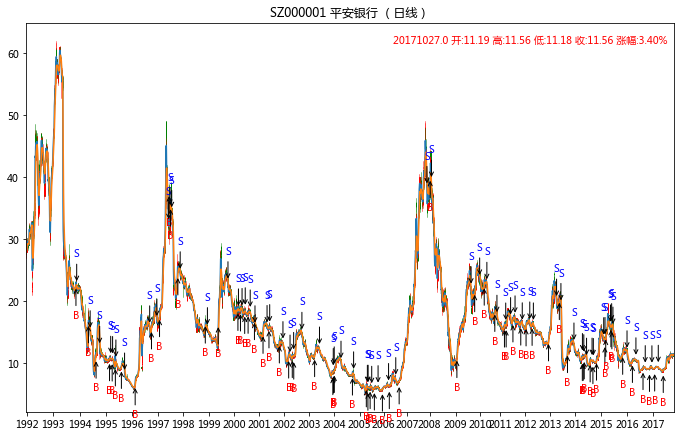

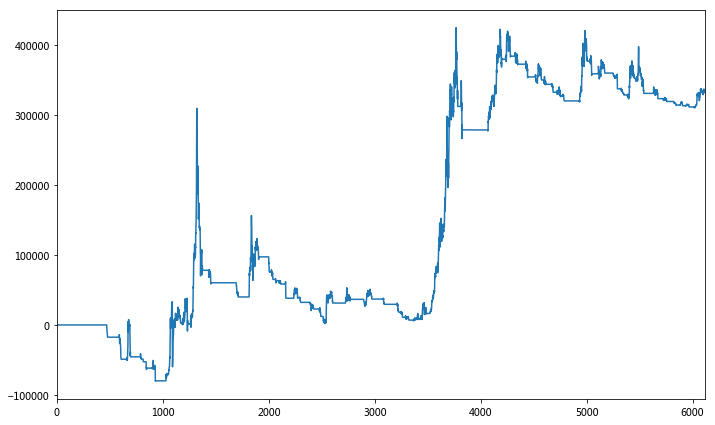

In [2]:
%matplotlib inline
%time from hikyuu.interactive.interactive import *
s = sm['sh000001']
k = s.getKData(Query(-1000000))
k.plot()

#创建模拟交易账户进行回测，初始资金30万
my_tm = crtTM(initCash = 300000)

#创建信号指示器（以5日EMA为快线，5日EMA自身的10日EMA最为慢线，快线向上穿越慢线时买入，反之卖出）
my_sg = SG_Flex(OP(EMA(n=11)), slow_n=44)

#固定每次买入1000股
my_mm = MM_FixedCount(10000)

#创建交易系统并运行
sys = SYS_Simple(tm = my_tm, sg = my_sg, mm = my_mm)
sys.run(sm['sz000001'], Query(-100000))
#绘制系统信号
sys.plot()

k = sm['sz000001'].getKData(Query(-100000))
c = CLOSE(k)
fast = EMA(c, 5)
slow = EMA(fast, 10)

#绘制信号指示器使用两个指标
fast.plot(new=False)
slow.plot(new=False)
#绘制资金收益曲线
x = my_tm.getProfitCurve(k.getDatetimeList(), KQuery.DAY)
x = PRICELIST(x)
x.plot()
#回测统计
from datetime import datetime

per = Performance()
print(per.report(my_tm, Datetime(datetime.today())))
